# 📊 EDA - Análisis Exploratorio de Datos Energéticos

## 🎯 Objetivo
Realizar un análisis exploratorio completo del dataset de consumo energético para:
- Entender patrones temporales de consumo
- Identificar correlaciones entre variables
- Detectar anomalías preliminares
- Preparar insights para modelado predictivo

**Dataset**: `Dataset_clean_test.csv` (procesado con data_cleaning.py)

In [1]:
# 📦 Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("🔄 Librerías cargadas exitosamente")

🔄 Librerías cargadas exitosamente


In [2]:
# 📊 Cargar dataset limpio
print("🔄 Cargando dataset limpio...")

# Cargar datos con datetime index
df = pd.read_csv('../data/Dataset_clean_test.csv', index_col=0, parse_dates=True)

print(f"✅ Dataset cargado: {len(df):,} filas, {len(df.columns)} columnas")
print(f"📅 Rango temporal: {df.index.min()} a {df.index.max()}")
print(f"⏱️ Duración total: {(df.index.max() - df.index.min()).days} días")

🔄 Cargando dataset limpio...
✅ Dataset cargado: 260,640 filas, 7 columnas
📅 Rango temporal: 2007-01-01 00:00:00 a 2007-06-30 23:59:00
⏱️ Duración total: 180 días


In [3]:
# 🔧 Preparar variables temporales para análisis
print("🔧 Agregando variables temporales...")

# Verificar que tenemos DatetimeIndex
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index, errors='coerce')
    print("✅ Índice convertido a DatetimeIndex")

# Crear variables temporales para análisis
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek  # 0=Monday, 6=Sunday
df['DayName'] = df.index.day_name()
df['Month'] = df.index.month
df['Date'] = df.index.date

print(f"✅ Variables temporales agregadas")
print(f"📊 Ejemplo de horas: {df['Hour'].unique()[:12]}")
print(f"📅 Días únicos: {df['DayName'].unique()}")

🔧 Agregando variables temporales...
✅ Variables temporales agregadas
📊 Ejemplo de horas: [ 0  1  2  3  4  5  6  7  8  9 10 11]
📅 Días únicos: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']


In [4]:
# 🔍 Información básica del dataset
print("📊 INFORMACIÓN GENERAL DEL DATASET")
print("=" * 50)

# Estructura del dataset
print(f"Shape: {df.shape}")
print(f"Columnas: {list(df.columns)}")
print(f"Tipos de datos:")
print(df.dtypes)
print("\n")

# Información de memoria
print(f"Uso de memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n")

# Muestra de los datos
print("📋 Primeras 5 filas:")
display(df.head())

print("\n📋 Últimas 5 filas:")
display(df.tail())

📊 INFORMACIÓN GENERAL DEL DATASET
Shape: (260640, 12)
Columnas: ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Hour', 'DayOfWeek', 'DayName', 'Month', 'Date']
Tipos de datos:
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Hour                       int32
DayOfWeek                  int32
DayName                   object
Month                      int32
Date                      object
dtype: object


Uso de memoria: 42.79 MB


📋 Primeras 5 filas:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,DayOfWeek,DayName,Month,Date
Datetime,,,,,,,,,,,,
2007-01-01 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,0,0,Monday,1,2007-01-01
2007-01-01 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,0,0,Monday,1,2007-01-01
2007-01-01 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,0,0,Monday,1,2007-01-01
2007-01-01 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,0,0,Monday,1,2007-01-01
2007-01-01 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,0,0,Monday,1,2007-01-01



📋 Últimas 5 filas:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,DayOfWeek,DayName,Month,Date
Datetime,,,,,,,,,,,,
2007-06-30 23:55:00,2.880,0.360,239.01,12.0,0.0,0.0,18.0,23,5,Saturday,6,2007-06-30
2007-06-30 23:56:00,2.892,0.358,238.86,12.2,0.0,0.0,17.0,23,5,Saturday,6,2007-06-30
2007-06-30 23:57:00,2.882,0.280,239.05,12.0,0.0,0.0,18.0,23,5,Saturday,6,2007-06-30
2007-06-30 23:58:00,2.660,0.290,238.98,11.2,0.0,0.0,18.0,23,5,Saturday,6,2007-06-30
2007-06-30 23:59:00,2.548,0.354,239.25,10.6,0.0,1.0,17.0,23,5,Saturday,6,2007-06-30


In [5]:
# 📈 Estadísticas descriptivas
print("📊 ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 50)

# Estadísticas básicas
stats = df.describe()
display(stats)

print("\n⚠️ VALORES NULOS POR COLUMNA:")
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

null_info = pd.DataFrame({
    'Valores_Nulos': null_counts,
    'Porcentaje': null_percentages.round(2)
})
display(null_info[null_info['Valores_Nulos'] > 0])

if null_info['Valores_Nulos'].sum() == 0:
    print("✅ ¡No hay valores nulos en el dataset!")

📊 ESTADÍSTICAS DESCRIPTIVAS


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,DayOfWeek,Month
count,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000,260640.000000,260640.0000,260640.000000,260640.000000
mean,1.164937,0.123729,239.208981,4.974755,1.332481,1.670610,5.747449,11.5000,2.983425,3.508287
std,1.181832,0.111872,3.592793,4.999493,6.704970,6.631361,8.157050,6.9222,1.993017,1.709964
min,0.082000,0.000000,223.490000,0.400000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000
25%,0.296000,0.000000,236.650000,1.400000,0.000000,0.000000,0.000000,5.7500,1.000000,2.000000
50%,0.564000,0.104000,239.610000,2.600000,0.000000,0.000000,0.000000,11.5000,3.000000,4.000000
75%,1.606000,0.194000,241.810000,6.800000,0.000000,1.000000,17.000000,17.2500,5.000000,5.000000
max,10.670000,1.148000,250.890000,46.400000,78.000000,78.000000,20.000000,23.0000,6.000000,6.000000



⚠️ VALORES NULOS POR COLUMNA:


,Valores_Nulos,Porcentaje
Global_active_power,3771,1.45
Global_reactive_power,3771,1.45
Voltage,3771,1.45
Global_intensity,3771,1.45
Sub_metering_1,3771,1.45
Sub_metering_2,3771,1.45


In [6]:
# Celda diagnóstica para verificar el índice
print("🔍 DIAGNÓSTICO DEL ÍNDICE DATETIME")
print("=" * 50)

# Verificar tipo del índice
print(f"Tipo de índice: {type(df.index)}")
print(f"Es DatetimeIndex: {isinstance(df.index, pd.DatetimeIndex)}")

# Si no es DatetimeIndex, intentar convertir
if not isinstance(df.index, pd.DatetimeIndex):
    print("⚠️ Convirtiendo índice a DatetimeIndex...")
    df.index = pd.to_datetime(df.index, errors='coerce')
    print("✅ Conversión completada")

# Verificar que no hay valores NaT en el índice
nat_count = df.index.isna().sum()
if nat_count > 0:
    print(f"⚠️ {nat_count} valores NaT encontrados en el índice")
    df = df.dropna()
    print("✅ Filas con índice NaT eliminadas")

print(f"📊 Índice final: {type(df.index)} con {len(df)} filas")

🔍 DIAGNÓSTICO DEL ÍNDICE DATETIME
Tipo de índice: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Es DatetimeIndex: True
📊 Índice final: <class 'pandas.core.indexes.datetimes.DatetimeIndex'> con 260640 filas


📈 VISUALIZACIÓN: SERIES TEMPORALES


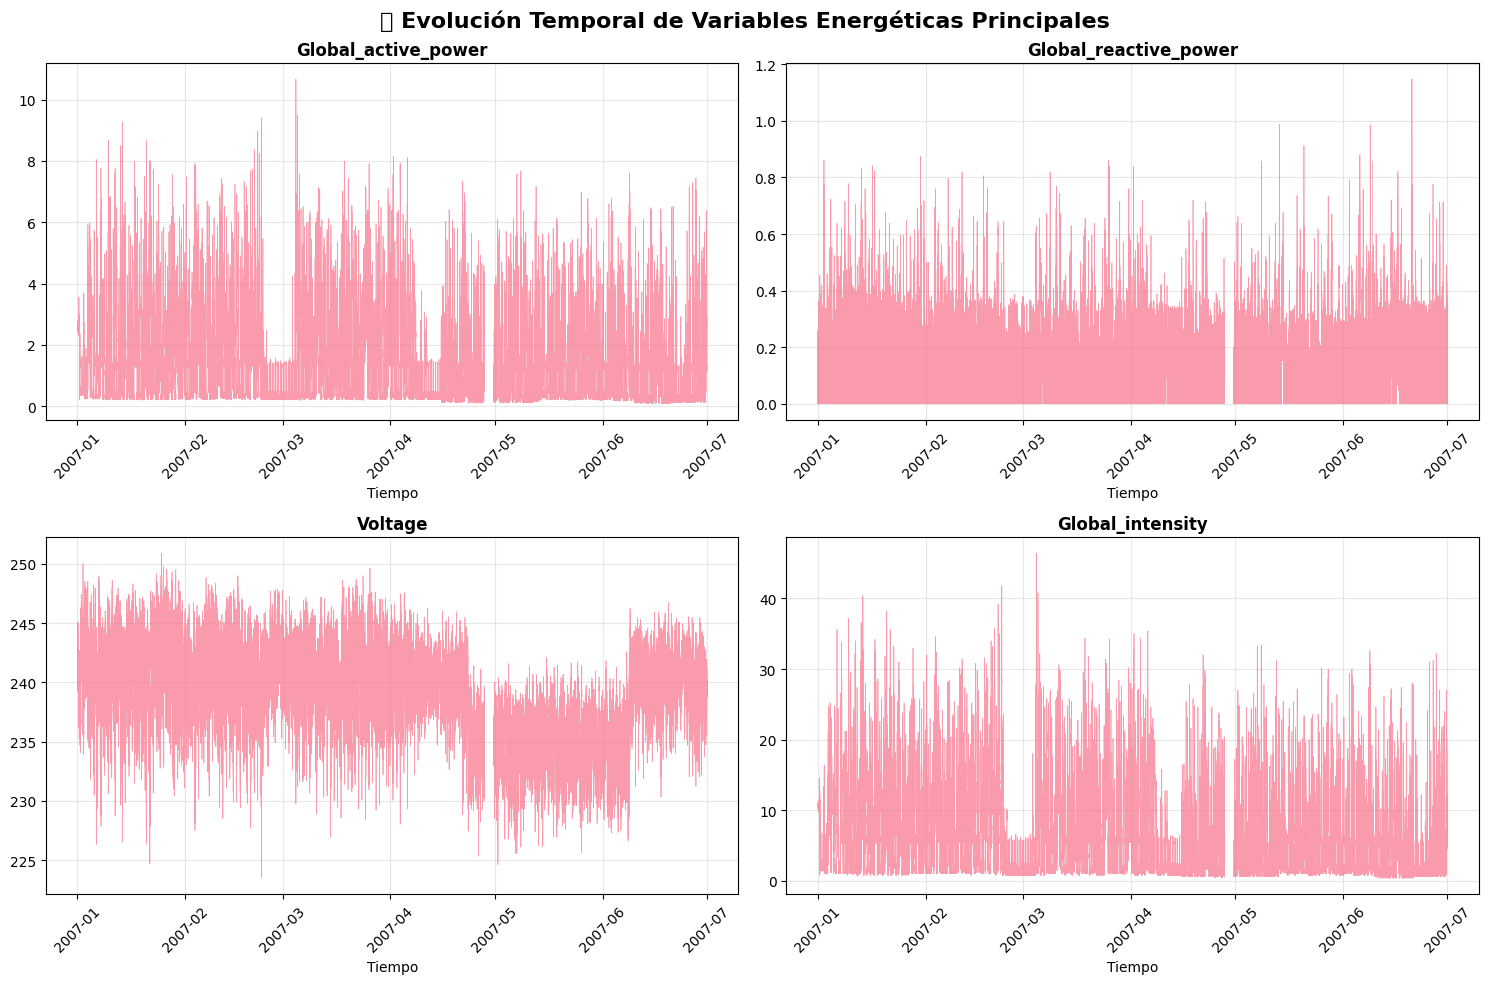

✅ Gráficos de series temporales generados


In [7]:
# 📊 Visualización 1: Series temporales principales
print("📈 VISUALIZACIÓN: SERIES TEMPORALES")
print("=" * 50)

# Variables energéticas principales
energy_vars = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📊 Evolución Temporal de Variables Energéticas Principales', fontsize=16, fontweight='bold')

for i, var in enumerate(energy_vars):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    
    # Graficar serie temporal
    ax.plot(df.index, df[var], alpha=0.7, linewidth=0.5)
    ax.set_title(f'{var}', fontweight='bold')
    ax.set_xlabel('Tiempo')
    ax.grid(True, alpha=0.3)
    
    # Rotar etiquetas del eje x para mejor legibilidad
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("✅ Gráficos de series temporales generados")

🏠 ANÁLISIS DE SUB-METERING


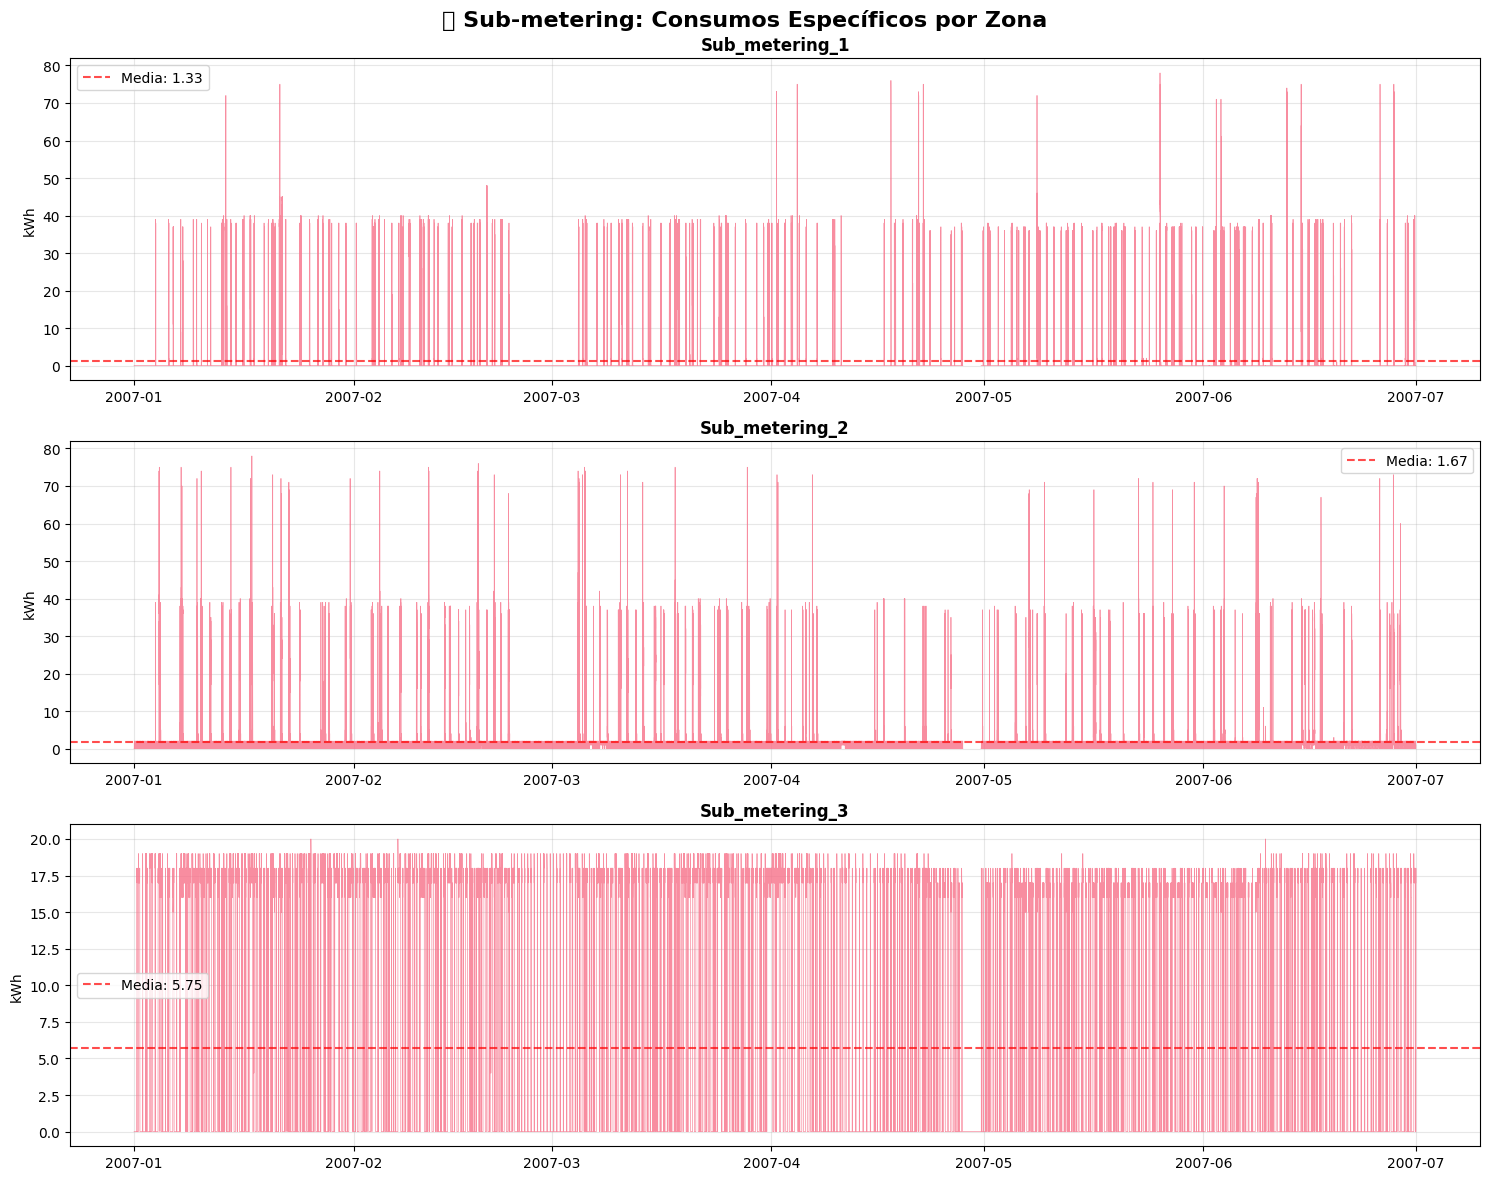

✅ Análisis de sub-metering completado


In [8]:
# 📊 Visualización 2: Sub-metering (consumos específicos)
print("🏠 ANÁLISIS DE SUB-METERING")
print("=" * 50)

sub_metering_vars = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

fig, axes = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle('🏠 Sub-metering: Consumos Específicos por Zona', fontsize=16, fontweight='bold')

for i, var in enumerate(sub_metering_vars):
    ax = axes[i]
    
    # Graficar serie temporal
    ax.plot(df.index, df[var], alpha=0.8, linewidth=0.5)
    ax.set_title(f'{var}', fontweight='bold')
    ax.set_ylabel('kWh')
    ax.grid(True, alpha=0.3)
    
    # Estadísticas en el gráfico
    mean_val = df[var].mean()
    max_val = df[var].max()
    ax.axhline(y=mean_val, color='red', linestyle='--', alpha=0.7, label=f'Media: {mean_val:.2f}')
    ax.legend()

plt.tight_layout()
plt.show()

print("✅ Análisis de sub-metering completado")

🌅 ANÁLISIS DE PATRONES DIARIOS


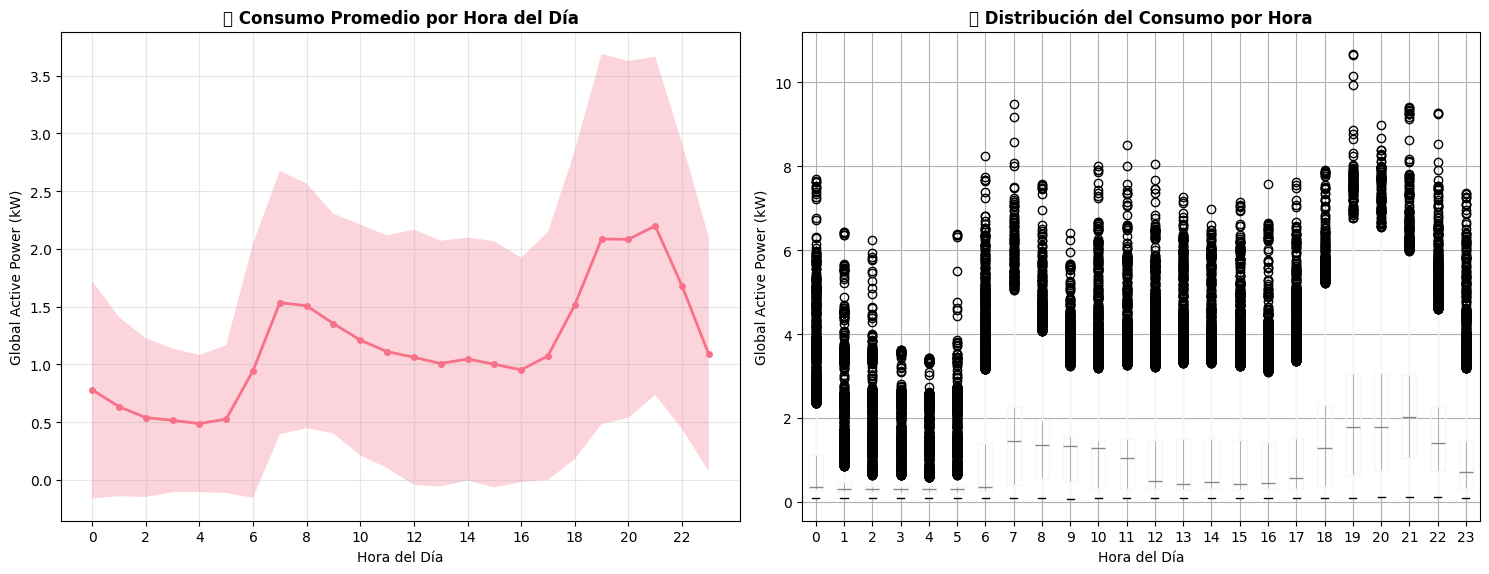

🔝 Hora pico: 21:00 (2.200 kW)
🔽 Hora valle: 4:00 (0.488 kW)
📊 Diferencia pico-valle: 1.712 kW


In [9]:
# 📊 Análisis de patrones diarios
print("🌅 ANÁLISIS DE PATRONES DIARIOS")
print("=" * 50)

# Consumo promedio por hora del día
hourly_consumption = df.groupby('Hour')['Global_active_power'].agg(['mean', 'std', 'min', 'max'])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Consumo promedio por hora
ax1 = axes[0]
ax1.plot(hourly_consumption.index, hourly_consumption['mean'], marker='o', linewidth=2, markersize=4)
ax1.fill_between(hourly_consumption.index, 
                hourly_consumption['mean'] - hourly_consumption['std'],
                hourly_consumption['mean'] + hourly_consumption['std'], 
                alpha=0.3)
ax1.set_title('📈 Consumo Promedio por Hora del Día', fontweight='bold')
ax1.set_xlabel('Hora del Día')
ax1.set_ylabel('Global Active Power (kW)')
ax1.set_xticks(range(0, 24, 2))
ax1.grid(True, alpha=0.3)

# Gráfico 2: Boxplot por hora
ax2 = axes[1]
df.boxplot(column='Global_active_power', by='Hour', ax=ax2)
ax2.set_title('📦 Distribución del Consumo por Hora', fontweight='bold')
ax2.set_xlabel('Hora del Día')
ax2.set_ylabel('Global Active Power (kW)')

plt.suptitle('')  # Quitar título automático de boxplot
plt.tight_layout()
plt.show()

# Identificar horas pico y valle
peak_hour = hourly_consumption['mean'].idxmax()
valley_hour = hourly_consumption['mean'].idxmin()
peak_consumption = hourly_consumption['mean'].max()
valley_consumption = hourly_consumption['mean'].min()

print(f"🔝 Hora pico: {peak_hour}:00 ({peak_consumption:.3f} kW)")
print(f"🔽 Hora valle: {valley_hour}:00 ({valley_consumption:.3f} kW)")
print(f"📊 Diferencia pico-valle: {(peak_consumption - valley_consumption):.3f} kW")

📅 ANÁLISIS DE PATRONES SEMANALES


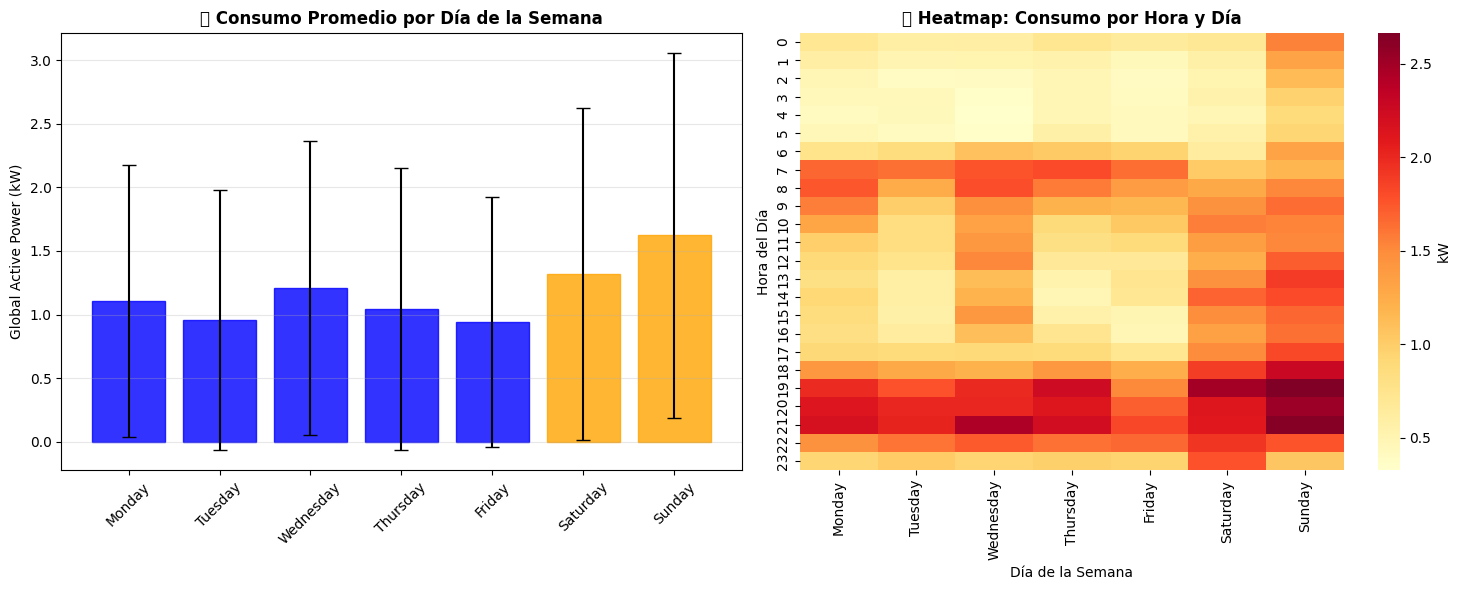

🏢 Consumo promedio días laborables: 1.051 kW
🏠 Consumo promedio fin de semana: 1.471 kW
📊 Diferencia: 0.420 kW (más en fin de semana)


In [10]:
# 📅 Análisis de patrones semanales
print("📅 ANÁLISIS DE PATRONES SEMANALES")
print("=" * 50)

# Consumo promedio por día de la semana
daily_consumption = df.groupby('DayName')['Global_active_power'].agg(['mean', 'std'])

# Ordenar días de la semana
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_consumption = daily_consumption.reindex(day_order)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Consumo promedio por día de la semana
ax1 = axes[0]
bars = ax1.bar(daily_consumption.index, daily_consumption['mean'], 
               yerr=daily_consumption['std'], capsize=5, alpha=0.8)
ax1.set_title('📅 Consumo Promedio por Día de la Semana', fontweight='bold')
ax1.set_ylabel('Global Active Power (kW)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Colorear diferente fines de semana
weekend_colors = ['blue' if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] 
                 else 'orange' for day in daily_consumption.index]
for bar, color in zip(bars, weekend_colors):
    bar.set_color(color)

# Gráfico 2: Heatmap hora vs día de la semana
ax2 = axes[1]
pivot_table = df.pivot_table(values='Global_active_power', index='Hour', columns='DayName', aggfunc='mean')
pivot_table = pivot_table[day_order]  # Reordenar columnas

sns.heatmap(pivot_table, annot=False, cmap='YlOrRd', ax=ax2, cbar_kws={'label': 'kW'})
ax2.set_title('🔥 Heatmap: Consumo por Hora y Día', fontweight='bold')
ax2.set_xlabel('Día de la Semana')
ax2.set_ylabel('Hora del Día')

plt.tight_layout()
plt.show()

# Comparación laborables vs fin de semana
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

weekday_mean = daily_consumption.loc[weekdays, 'mean'].mean()
weekend_mean = daily_consumption.loc[weekends, 'mean'].mean()

print(f"🏢 Consumo promedio días laborables: {weekday_mean:.3f} kW")
print(f"🏠 Consumo promedio fin de semana: {weekend_mean:.3f} kW")
print(f"📊 Diferencia: {abs(weekend_mean - weekday_mean):.3f} kW ({('más' if weekend_mean > weekday_mean else 'menos')} en fin de semana)")

🔗 ANÁLISIS DE CORRELACIONES


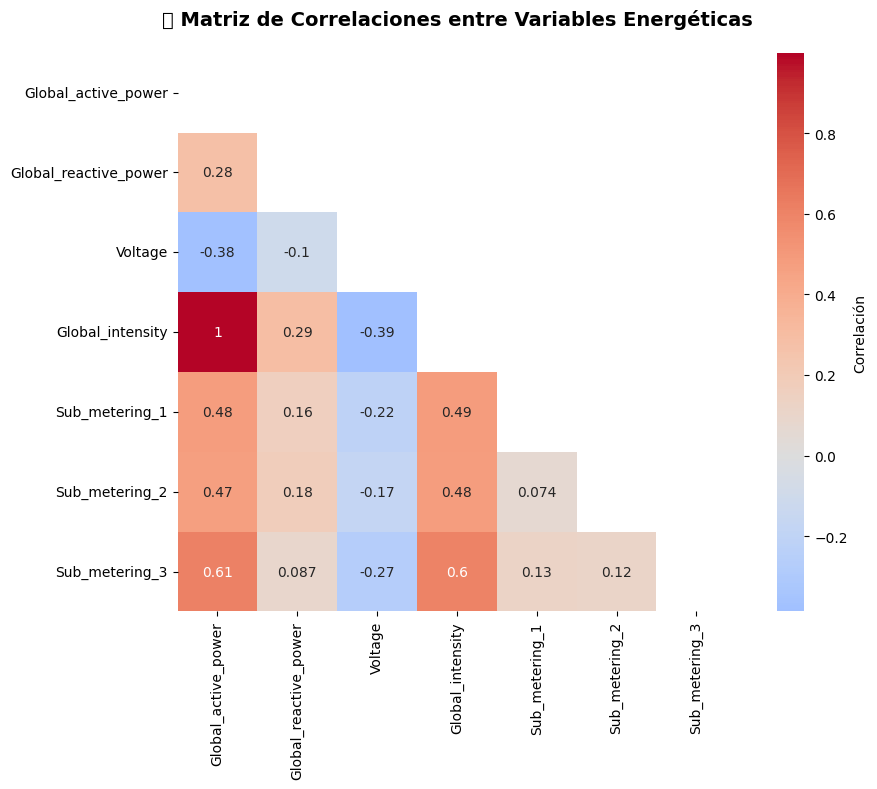

📊 CORRELACIONES MÁS RELEVANTES:
----------------------------------------
1. Global_active_power ↔ Global_intensity: 0.999
2. Global_active_power ↔ Sub_metering_3: 0.609
3. Global_intensity ↔ Sub_metering_3: 0.599
4. Global_intensity ↔ Sub_metering_1: 0.486
5. Global_active_power ↔ Sub_metering_1: 0.481


In [11]:
# 🔗 Análisis de correlaciones
print("🔗 ANÁLISIS DE CORRELACIONES")
print("=" * 50)

# Seleccionar solo variables numéricas (excluir columnas temporales agregadas)
numeric_vars = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
               'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

correlation_matrix = df[numeric_vars].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara para mostrar solo triángulo inferior
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            mask=mask, square=True, cbar_kws={'label': 'Correlación'})
plt.title('🔗 Matriz de Correlaciones entre Variables Energéticas', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identificar correlaciones más altas
print("📊 CORRELACIONES MÁS RELEVANTES:")
print("-" * 40)

# Obtener correlaciones sin la diagonal (excluir correlaciones de 1.0)
correlations_flat = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        correlations_flat.append((var1, var2, corr_value))

# Ordenar por valor absoluto de correlación
correlations_flat.sort(key=lambda x: abs(x[2]), reverse=True)

# Mostrar las 5 correlaciones más altas
for i, (var1, var2, corr) in enumerate(correlations_flat[:5]):
    print(f"{i+1}. {var1} ↔ {var2}: {corr:.3f}")

📊 ANÁLISIS DE DISTRIBUCIONES


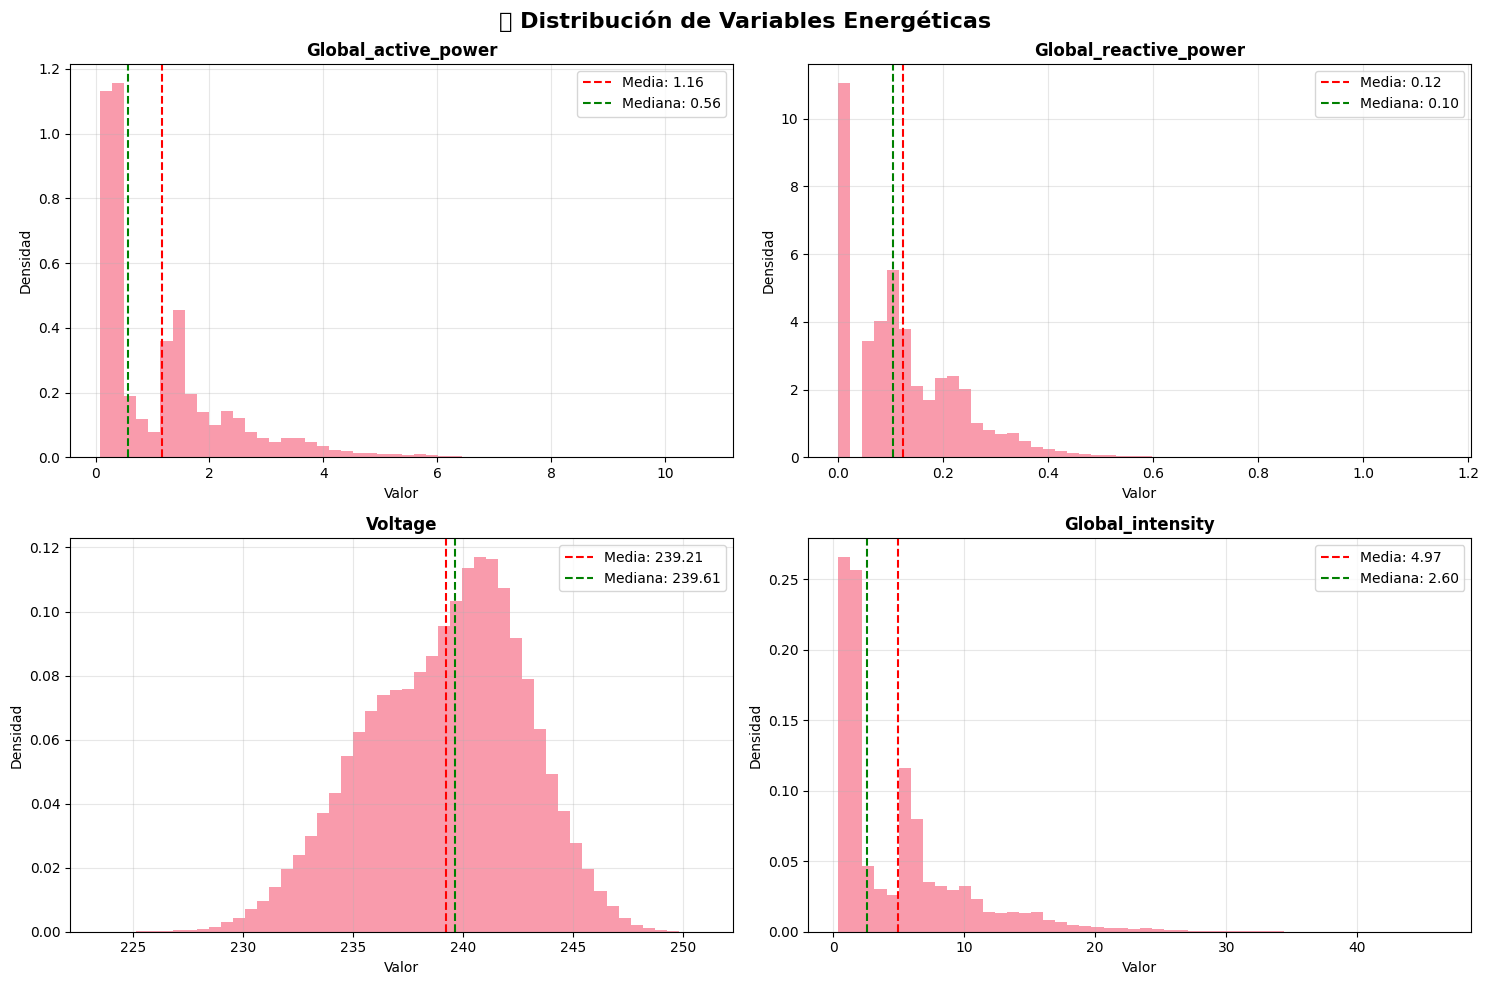

✅ Análisis de distribuciones completado


In [12]:
# 📊 Análisis de distribuciones
print("📊 ANÁLISIS DE DISTRIBUCIONES")
print("=" * 50)

# Histogramas de variables principales
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📊 Distribución de Variables Energéticas', fontsize=16, fontweight='bold')

main_vars = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

for i, var in enumerate(main_vars):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    
    # Histograma
    ax.hist(df[var].dropna(), bins=50, alpha=0.7, density=True)
    
    # Estadísticas en el gráfico
    mean_val = df[var].mean()
    median_val = df[var].median()
    
    ax.axvline(mean_val, color='red', linestyle='--', label=f'Media: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', label=f'Mediana: {median_val:.2f}')
    
    ax.set_title(f'{var}', fontweight='bold')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Densidad')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Análisis de distribuciones completado")

⚠️ DETECCIÓN PRELIMINAR DE ANOMALÍAS
📊 Variable analizada: Global_active_power
🔽 Límite inferior: -1.669 kW
🔝 Límite superior: 3.571 kW
⚠️ Anomalías detectadas: 13,664 (5.24% del dataset)
📈 Valor máximo anómalo: 10.670 kW
📉 Valor mínimo anómalo: 3.572 kW


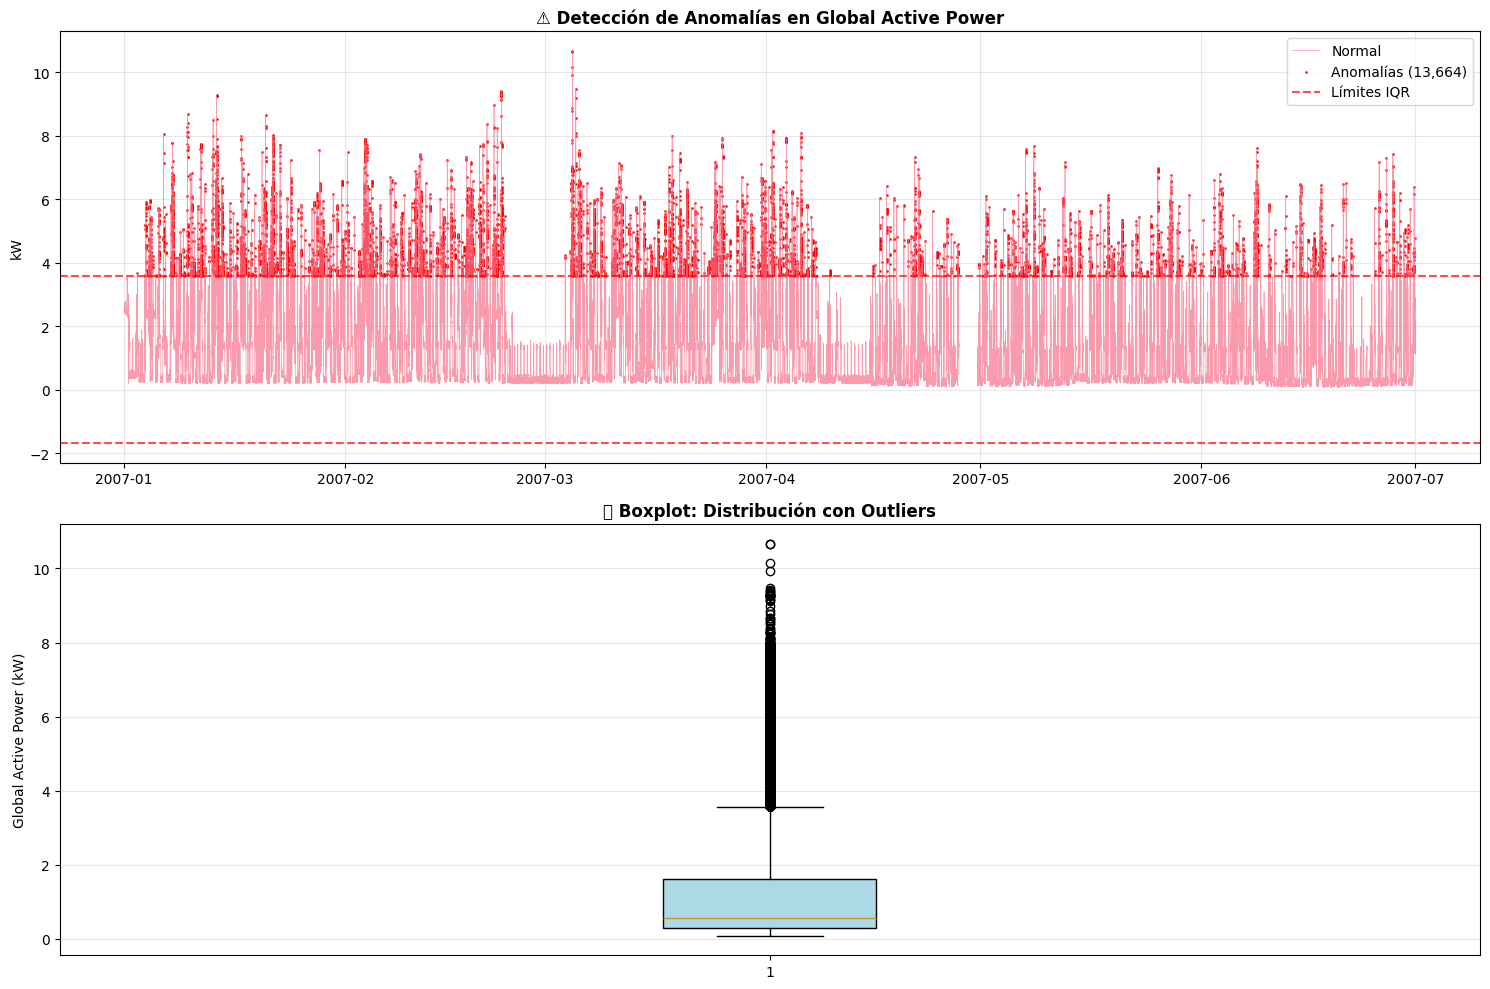

In [13]:
# ⚠️ Detección preliminar de anomalías
print("⚠️ DETECCIÓN PRELIMINAR DE ANOMALÍAS")
print("=" * 50)

def detect_outliers_iqr(data, variable, multiplier=1.5):
    """Detectar outliers usando el método IQR"""
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    outliers = data[(data[variable] < lower_bound) | (data[variable] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detectar anomalías en Global_active_power
outliers, lower_bound, upper_bound = detect_outliers_iqr(df, 'Global_active_power')

print(f"📊 Variable analizada: Global_active_power")
print(f"🔽 Límite inferior: {lower_bound:.3f} kW")
print(f"🔝 Límite superior: {upper_bound:.3f} kW")
print(f"⚠️ Anomalías detectadas: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}% del dataset)")

if len(outliers) > 0:
    print(f"📈 Valor máximo anómalo: {outliers['Global_active_power'].max():.3f} kW")
    print(f"📉 Valor mínimo anómalo: {outliers['Global_active_power'].min():.3f} kW")
    
    # Visualizar anomalías
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    
    # Serie temporal con anomalías marcadas
    ax1 = axes[0]
    ax1.plot(df.index, df['Global_active_power'], alpha=0.7, linewidth=0.5, label='Normal')
    ax1.scatter(outliers.index, outliers['Global_active_power'], 
               color='red', s=1, alpha=0.8, label=f'Anomalías ({len(outliers):,})')
    ax1.axhline(y=upper_bound, color='red', linestyle='--', alpha=0.7, label='Límites IQR')
    ax1.axhline(y=lower_bound, color='red', linestyle='--', alpha=0.7)
    ax1.set_title('⚠️ Detección de Anomalías en Global Active Power', fontweight='bold')
    ax1.set_ylabel('kW')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Boxplot con anomalías
    ax2 = axes[1]
    bp = ax2.boxplot(df['Global_active_power'].dropna(), patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    ax2.set_title('📦 Boxplot: Distribución con Outliers', fontweight='bold')
    ax2.set_ylabel('Global Active Power (kW)')
    ax2.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
else:
    print("✅ No se detectaron anomalías significativas")

In [14]:
# 📋 Resumen y conclusiones del EDA
print("📋 RESUMEN Y CONCLUSIONES DEL EDA")
print("=" * 60)

print("📊 DATOS GENERALES:")
print(f"• Total de registros: {len(df):,}")
print(f"• Período analizado: {(df.index.max() - df.index.min()).days} días")
print(f"• Frecuencia de datos: 1 minuto")
print(f"• Variables analizadas: {len(numeric_vars)}")

print("\n🔍 PATRONES IDENTIFICADOS:")
print(f"• Hora de mayor consumo: {peak_hour}:00 ({peak_consumption:.3f} kW)")
print(f"• Hora de menor consumo: {valley_hour}:00 ({valley_consumption:.3f} kW)")
print(f"• Diferencia pico-valle: {(peak_consumption - valley_consumption):.3f} kW")
print(f"• Consumo laborables vs fin de semana: {'Fin de semana mayor' if weekend_mean > weekday_mean else 'Días laborables mayor'}")

print("\n🔗 CORRELACIONES PRINCIPALES:")
for i, (var1, var2, corr) in enumerate(correlations_flat[:3]):
    print(f"• {var1} ↔ {var2}: {corr:.3f}")

print("\n⚠️ CALIDAD DE DATOS:")
if null_info['Valores_Nulos'].sum() == 0:
    print("• ✅ Sin valores nulos")
else:
    print(f"• ⚠️ {null_info['Valores_Nulos'].sum():,} valores nulos encontrados")

print(f"• Anomalías detectadas: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")

print("\n🎯 RECOMENDACIONES PARA MODELADO:")
print("• ✅ Los datos muestran clara estacionalidad diaria - ideal para Prophet/ARIMA")
print("• ✅ Variables con correlaciones altas pueden usarse en modelos multivariados")
print("• ✅ Patrones claros de consumo facilitan detección de anomalías")
print("• 🔄 Considerar feature engineering: hora del día, día de la semana, variables lag")

print("\n🚀 PRÓXIMOS PASOS:")
print("1. Implementar modelos de predicción (Prophet, ARIMA, LSTM)")
print("2. Desarrollar sistema de detección de anomalías (Isolation Forest)")
print("3. Crear reportes automáticos con insights encontrados")
print("4. Configurar alertas para anomalías en tiempo real")

print("\n✅ ANÁLISIS EXPLORATORIO COMPLETADO")

📋 RESUMEN Y CONCLUSIONES DEL EDA
📊 DATOS GENERALES:
• Total de registros: 260,640
• Período analizado: 180 días
• Frecuencia de datos: 1 minuto
• Variables analizadas: 7

🔍 PATRONES IDENTIFICADOS:
• Hora de mayor consumo: 21:00 (2.200 kW)
• Hora de menor consumo: 4:00 (0.488 kW)
• Diferencia pico-valle: 1.712 kW
• Consumo laborables vs fin de semana: Fin de semana mayor

🔗 CORRELACIONES PRINCIPALES:
• Global_active_power ↔ Global_intensity: 0.999
• Global_active_power ↔ Sub_metering_3: 0.609
• Global_intensity ↔ Sub_metering_3: 0.599

⚠️ CALIDAD DE DATOS:
• ⚠️ 22,626 valores nulos encontrados
• Anomalías detectadas: 13,664 (5.24%)

🎯 RECOMENDACIONES PARA MODELADO:
• ✅ Los datos muestran clara estacionalidad diaria - ideal para Prophet/ARIMA
• ✅ Variables con correlaciones altas pueden usarse en modelos multivariados
• ✅ Patrones claros de consumo facilitan detección de anomalías
• 🔄 Considerar feature engineering: hora del día, día de la semana, variables lag

🚀 PRÓXIMOS PASOS:
1. Impl

In [15]:
# 💾 Guardar insights para uso posterior
print("💾 GUARDANDO INSIGHTS PARA MODELADO")
print("=" * 50)

# Guardar estadísticas clave en diccionario
eda_insights = {
    'dataset_info': {
        'total_records': len(df),
        'time_range_days': (df.index.max() - df.index.min()).days,
        'start_date': str(df.index.min()),
        'end_date': str(df.index.max())
    },
    'consumption_patterns': {
        'peak_hour': int(peak_hour),
        'valley_hour': int(valley_hour),
        'peak_consumption': float(peak_consumption),
        'valley_consumption': float(valley_consumption),
        'weekday_mean': float(weekday_mean),
        'weekend_mean': float(weekend_mean)
    },
    'data_quality': {
        'null_values': int(null_info['Valores_Nulos'].sum()),
        'outliers_count': len(outliers),
        'outliers_percentage': float(len(outliers)/len(df)*100)
    },
    'top_correlations': [(var1, var2, float(corr)) for var1, var2, corr in correlations_flat[:5]]
}

# Guardar en archivo JSON para uso en otros módulos
import json
with open('../data/eda_insights.json', 'w') as f:
    json.dump(eda_insights, f, indent=2)

print("✅ Insights guardados en 'data/eda_insights.json'")
print("🔄 Datos preparados para la fase de modelado predictivo")

# Limpiar columnas temporales agregadas para análisis
df_clean = df.drop(columns=['Hour', 'DayOfWeek', 'DayName', 'Month', 'Date'])
print(f"📊 Dataset limpio final: {df_clean.shape}")

💾 GUARDANDO INSIGHTS PARA MODELADO
✅ Insights guardados en 'data/eda_insights.json'
🔄 Datos preparados para la fase de modelado predictivo
📊 Dataset limpio final: (260640, 7)
